Ttest_indResult(statistic=4.446519303351453, pvalue=0.000311706775566705)

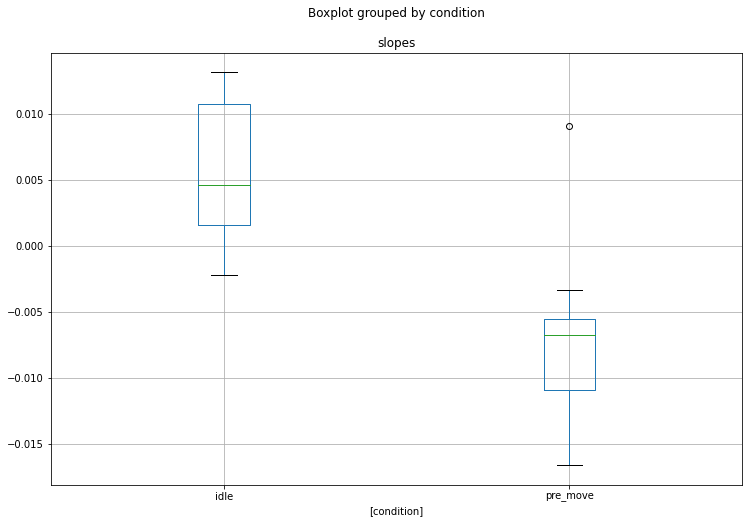

In [2]:
import pandas as pd

slope = pd.read_csv('/Volumes/Lukas_Gehrke/fastReach/data/PI_results_design_slope_processed.csv')

# plot a box plot of the slope values by condition
slope.boxplot(column=['slopes'], by=['condition'], figsize=(12,8))

# ttest for the slope values by condition
from scipy import stats

stats.ttest_ind(slope['slopes'][slope['condition'] == 'idle'], slope['slopes'][slope['condition'] == 'pre_move'])


In [3]:
erp = pd.read_csv('/Volumes/Lukas_Gehrke/fastReach/data/PI_results_design_erp_processed.csv')

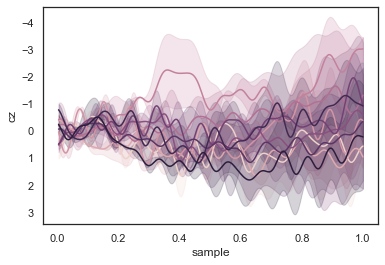

In [4]:
import matplotlib.pyplot as plt

# Seaborn lineplot from erp
import seaborn as sns
sns.set(style="white")


# Plot the responses for different events and regions
sns.lineplot(x="sample", y="cz", hue="id", data=erp, legend=False)

# flip y axis
plt.gca().invert_yaxis()


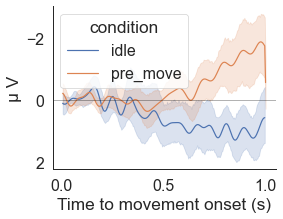

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


NameError: name 'title' is not defined

In [6]:

with sns.plotting_context('paper', font_scale = 1.8):

    ### Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    fig.patch.set_alpha(1)

    sns.despine() #bottom=True, left=True
    
    ax = sns.lineplot(data = erp, x = 'sample', y = 'cz', hue = 'condition')

    # add a solid line at y = 0
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha = 0.3)

    # flip y axis
    plt.gca().invert_yaxis()
    
    # # Label and show
    # # label_plot_for_subcats(ax)
    # ax.set_title(title)
    ax.set_ylabel('\u03BC V')
    ax.set_xlabel('Time to movement onset (s)')

    plt.show()
    fig.savefig('erp' +'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)
    fig.savefig('results/'+title + '_' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


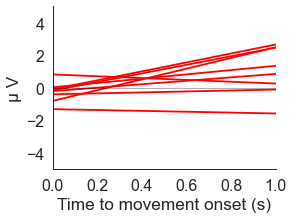

In [62]:
data_to_plot = erp[erp['condition'] == 'idle']

with sns.plotting_context('paper', font_scale = 1.8):

    ### Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    fig.patch.set_alpha(1)

    sns.despine() #bottom=True, left=True
    
    # ax = sns.lineplot(data = data_to_plot, x = 'sample', y = 'cz', hue = 'id', legend=False)

    for i in data_to_plot['id'].unique():

        data_to_plot_id = data_to_plot[data_to_plot['id'] == i]

        # add a linear fit line for each id
        ax = sns.regplot(x="sample", y="cz", data=data_to_plot_id, scatter=False, ci=False, truncate=False, color='red')

    

    # add a solid line at y = 0
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha = 0.3)

    
    # # Label and show
    # # label_plot_for_subcats(ax)
    # ax.set_title(title)
    ax.set_ylabel('\u03BC V')
    ax.set_xlabel('Time to movement onset (s)')

    # set axis limits to +4 -5
    ax.set_ylim([-5,5])

    # flip the ticks on the x axis

    # plt.show()
    fig.savefig('slope_idle' +'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)
    # fig.savefig('results/'+title + '_' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)

# Plot EMG for pipeline graphic

In [3]:
# without header
emg = pd.read_csv('/Volumes/Lukas_Gehrke/fastReach/data/emg_st.csv', header=None).T

# change column names from 1 - current column name / 250
emg.columns = emg.columns.to_series().apply(lambda x: 1 - x/250)
# drop the first column
emg = emg.drop(emg.columns[0], axis=1)

# emg wide to long
emg_long = pd.melt(emg)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


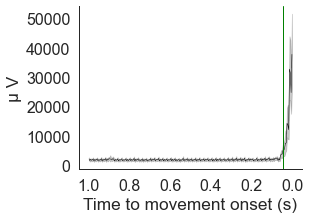

In [8]:
data_to_plot = emg.T

with sns.plotting_context('paper', font_scale = 1.8):

    ### Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    fig.patch.set_alpha(1)

    sns.despine() #bottom=True, left=True
    
    # lineplot with solid lines in the same color and single trials
    ax = sns.lineplot(data = emg_long, x = 'variable', y = 'value', color = 'black', linewidth = 0.5)

    # flip x axis
    plt.gca().invert_xaxis()

    # ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha = 0.3)

    # add a line at x = .95
    # ax.axvline(x=1-.95, color='black', linestyle='-', linewidth=1, alpha = 0.3)
    ax.axvline(x=1-.95, color='green', linestyle='-', linewidth=1, alpha = 1)
    
    # # Label and show
    # # label_plot_for_subcats(ax)
    # ax.set_title(title)
    ax.set_ylabel('\u03BC V')
    ax.set_xlabel('Time to movement onset (s)')

    # plt.show()
    fig.savefig('emg_raw' +'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)
    fig.savefig('emg_raw' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)

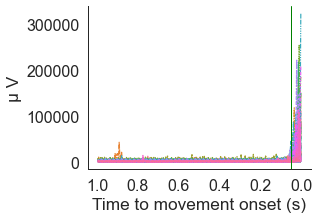

In [6]:
data_to_plot = emg.mean()

with sns.plotting_context('paper', font_scale = 1.8):

    ### Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    fig.patch.set_alpha(1)

    sns.despine() #bottom=True, left=True
    
    ax = sns.lineplot(data = data_to_plot, legend=False)

    # flip x axis
    plt.gca().invert_xaxis()

    # ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha = 0.3)

    # add a line at x = .95
    ax.axvline(x=1-.95, color='green', linestyle='-', linewidth=1, alpha = 1)

    
    # # Label and show
    # # label_plot_for_subcats(ax)
    # ax.set_title(title)
    ax.set_ylabel('\u03BC V')
    ax.set_xlabel('Time to movement onset (s)')

    # plt.show()
    fig.savefig('emg_raw_mean' +'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)
    # fig.savefig('results/'+title + '_' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)